In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

# [OpenCV 颜色空间转换参数CV_BGR2GRAY改变](http://www.cnblogs.com/liu-jun/p/3457554.html)

In [2]:
# cv2.cvtColor?

In [3]:
img_src_bgr = cv2.imread('../../data/simple_object.png') # cv2默认颜色空间格式为BGR

In [4]:
img_src_bgr.shape

(300, 400, 3)

In [5]:
img_src_rgb = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2RGB) # 转换为RGB格式

In [6]:
img_src_rgb.shape

(300, 400, 3)

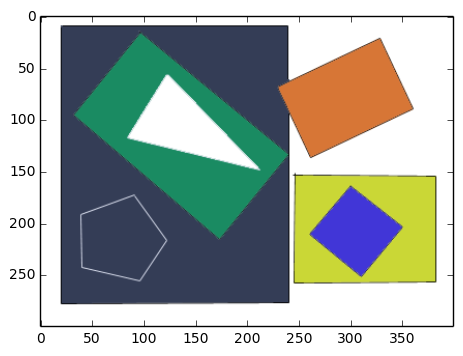

In [7]:
plt.imshow(img_src_rgb)

In [8]:
dst_src = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2GRAY)

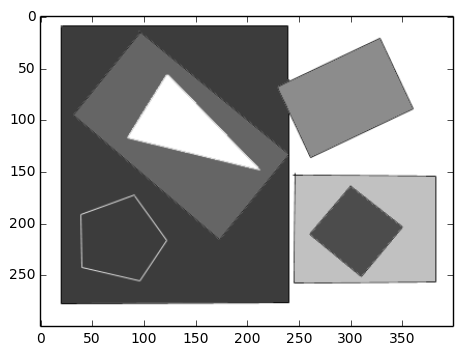

In [9]:
plt.imshow(dst_src, cmap='gray')

In [10]:
def rgb2gray(rgb):
    height, width, channel = rgb.shape
    assert channel==3
    gray = np.zeros((height, width), dtype=rgb.dtype)
    for row in range(height):
        for col in range(width):
            r = rgb[row, col, 0]
            g = rgb[row, col, 1]
            b = rgb[row, col, 2]
            gray[row, col] = int(0.299*r + 0.587*g + 0.114*b) # rgb转换为gray公式
    return gray

In [11]:
0.299+0.587+0.114

0.9999999999999999

In [12]:
gray = rgb2gray(img_src_rgb)

In [13]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

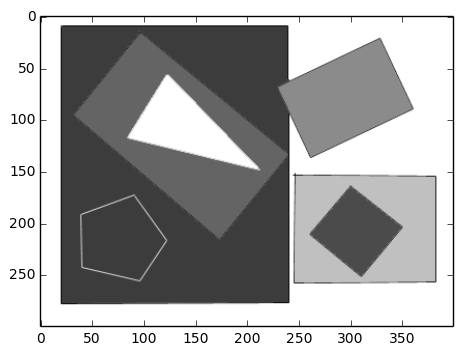

In [14]:
plt.imshow(gray, cmap='gray')

In [15]:
dst_src

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
hsv_img = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2HSV)

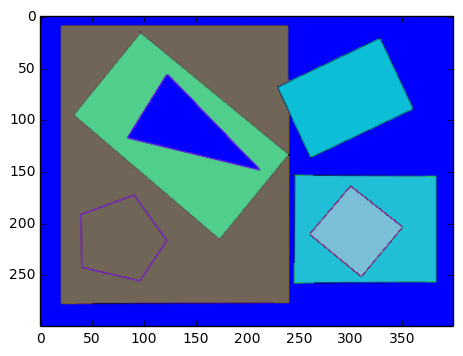

In [17]:
plt.imshow(hsv_img) # hsv图像，H表示色度[0,179]，S表示饱和度[0,255]，V表示亮度[0,255]

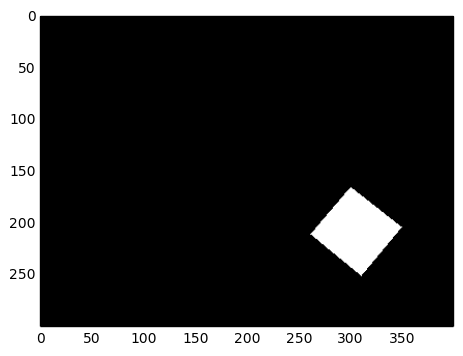

In [18]:
lower_blue = np.array([110,100,100])
upper_blue=np.array([130,255,255])
hsv_img_blue_mask = cv2.inRange(hsv_img, lower_blue, upper_blue)
plt.imshow(hsv_img_blue_mask, cmap='gray')

In [19]:
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
print('green_hsv:', green_hsv) # 为了获取green上下阈值，这里设置[H-100,H+100]，同时保持H+100小于等于179
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
print('blue_hsv:', blue_hsv) # 为了获取green上下阈值，这里设置[H-100,H+100]，同时保持H+100小于等于179

('green_hsv:', array([[[ 60, 255, 255]]], dtype=uint8))
('blue_hsv:', array([[[120, 255, 255]]], dtype=uint8))
